# Financial Analysis based on Market Sentiment

In [2]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importing raw data

sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

## Exploring the data

In [7]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


#### Checking datatypes, and null values (if any)

In [12]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


##### No null values present in sentiment data.

In [15]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

##### No null values present in trades data.

#### Changing Date column in sentiment dataset to Date datatype.

In [19]:
sentiment['Date'] = pd.to_datetime(sentiment['date'])
sentiment = sentiment.drop(columns = ['date'])
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   Date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


#### Splitting the Timestamp IST column into separate Date and Time columns.

In [22]:
trades[['Date', 'Time']] = trades['Timestamp IST'].str.split(expand = True)
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Time
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,02-12-2024,22:50
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,02-12-2024,22:50
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,02-12-2024,22:50
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,02-12-2024,22:50
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,02-12-2024,22:50


#### Changing Date column in trades dataset into Date datatype.

In [25]:
trades['Date'] = pd.to_datetime(trades['Date'], format = '%d-%m-%Y')

In [27]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

## Combining the sentiment and trades dataset into a single dataset for analysis.

### Merging the 2 datasets using the common Date column.

In [31]:
merged = pd.merge(trades, sentiment, on = 'Date', how = 'inner')
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Time,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,22:50,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,22:50,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,22:50,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,22:50,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,22:50,1733117400,80,Extreme Greed


#### Creating a uniform palette for sentiments for visualizations.

In [34]:
palette = {
    'Extreme Fear': '#d73027',
    'Fear': '#fc8d59',
    'Greed': '#91cf60',
    'Extreme Greed': '#1a9850',
    'Neutral': '#2c7bb6'
}

## EDA

### 1. Trader Performance (Sum of Closed PnL) vs Sentiment

#### Calculating Total PnL per sentiment.

In [39]:
# sum of pnl grouped by sentiment

pnl = merged.groupby('classification')['Closed PnL'].sum().reset_index()
pnl

,classification,Closed PnL
0,Extreme Fear,7.391102e+05
1,Extreme Greed,2.715171e+06
2,Fear,3.357155e+06
3,Greed,2.150129e+06
4,Neutral,1.292921e+06


#### Calculating Percent Contribution of each Sentiment to total PnL.

In [42]:
pnl['pnl_contribution%'] = ((pnl['Closed PnL'] / pnl['Closed PnL'].sum()) *100).round(2)
pnl

,classification,Closed PnL,pnl_contribution%
0,Extreme Fear,7.391102e+05,7.21
1,Extreme Greed,2.715171e+06,26.48
2,Fear,3.357155e+06,32.74
3,Greed,2.150129e+06,20.97
4,Neutral,1.292921e+06,12.61


In [44]:
# Dividing values by 1 million to make it easier to visualise on the chart.

pnl['Closed PnL'] = pnl['Closed PnL']/1000000

#### Visualization of PnL vs Sentiment

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\1411229885.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = pnl.sort_values(by = 'Closed PnL'), x = 'classification', y = 'Closed PnL', palette = palette).set_axisbelow(True)


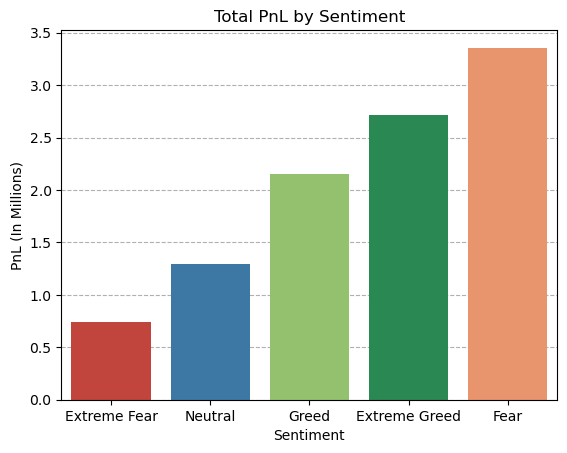

In [47]:
sns.barplot(data = pnl.sort_values(by = 'Closed PnL'), x = 'classification', y = 'Closed PnL', palette = palette).set_axisbelow(True)
plt.title('Total PnL by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('PnL (In Millions)')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

#### Insight : Trading performance is highest during Fear periods, contributing 32.74% of total PnL, followed by Extreme Greed at 26.48%. Conversely, Extreme Fear periods generate the lowest PnL, contributing only 7.21%.

### 2. Avg Risk (Size) vs Sentiment

#### Calculating Avg Size per Sentiment.

In [52]:
size = merged.groupby('classification')['Size USD'].mean().round(2).reset_index()
size

,classification,Size USD
0,Extreme Fear,5349.73
1,Extreme Greed,3112.25
2,Fear,7816.11
3,Greed,5736.88
4,Neutral,4782.73


#### Calculating Deviation Percent from Baseline Avg Size (Avg Size during Neutral Sentiment)

In [55]:
# taking neutral as baseline for avg size deviations.

baseline = size[size['classification'] == 'Neutral']['Size USD'].mean()
size['Deviation%'] = ((size['Size USD'] - baseline) / baseline)*100
size

,classification,Size USD,Deviation%
0,Extreme Fear,5349.73,11.855154
1,Extreme Greed,3112.25,-34.927332
2,Fear,7816.11,63.423610
3,Greed,5736.88,19.949903
4,Neutral,4782.73,0.000000


#### Visualization of Deviation vs Sentiment

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\999575460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = size.sort_values(by = 'Deviation%'), x = 'classification', y = 'Deviation%', palette = palette).set_axisbelow(True)


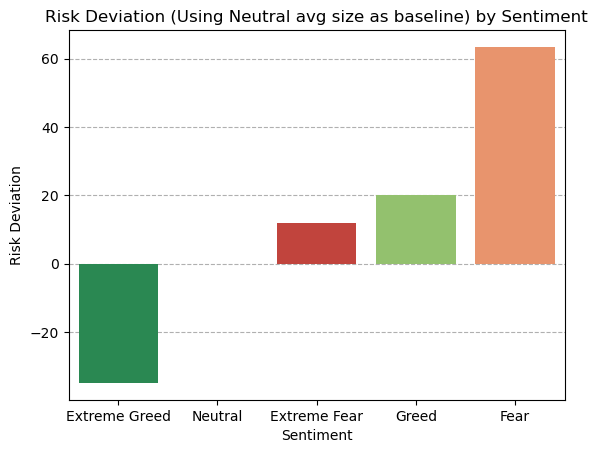

In [58]:
# deviation % vs sentiment barplot

sns.barplot(data = size.sort_values(by = 'Deviation%'), x = 'classification', y = 'Deviation%', palette = palette).set_axisbelow(True)
plt.title('Risk Deviation (Using Neutral avg size as baseline) by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Risk Deviation')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

#### Insight : Using Average Risk during Neutral sentiment, the following insights have been generated :
#### 1. Average Risk increases by ~63.4% during Fear sentiment.
#### 2. Average Risk decreased by ~34.9% during Extreme Greed sentiment.

### 3. Trades Quantity vs Sentiment

#### Calculating Count of trades per Sentiment

In [63]:
# no. of trades during each sentiment

count = merged.groupby('classification')['classification'].count()
count = count.reset_index(name = 'trades')
count

,classification,trades
0,Extreme Fear,21400
1,Extreme Greed,39992
2,Fear,61837
3,Greed,50303
4,Neutral,37686


#### Calculating Percent Contribution of Total Trades during for each Sentiment.

In [66]:
count['trade%'] = (((count['trades'])/count['trades'].sum())*100).round(2)
count

,classification,trades,trade%
0,Extreme Fear,21400,10.13
1,Extreme Greed,39992,18.93
2,Fear,61837,29.28
3,Greed,50303,23.82
4,Neutral,37686,17.84


#### Visualization of Trade Quantity vs Sentiment

C:\Users\hp\AppData\Local\Temp\ipykernel_12496\2285767568.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count.sort_values(by = 'trades'), x = 'classification', y = 'trades', palette = palette).set_axisbelow(True)


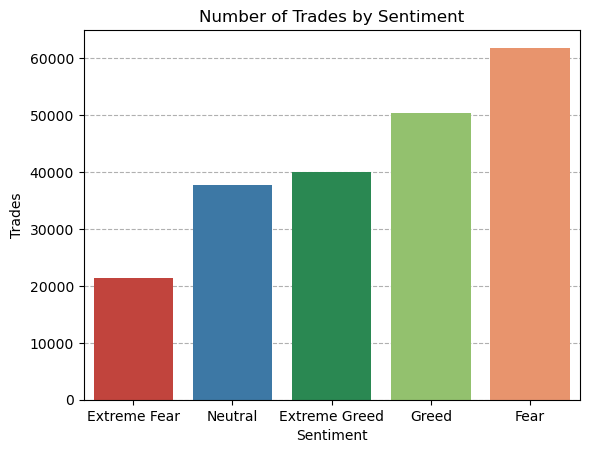

In [69]:
sns.barplot(data = count.sort_values(by = 'trades'), x = 'classification', y = 'trades', palette = palette).set_axisbelow(True)
plt.title('Number of Trades by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Trades')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

#### Insight : Analysis of trade sentiments shows that Fear dominates with 29.28% of total trades (61837 trades), while Extreme Fear is comparatively low at 10.13% (21400 trades).